### Importing necessary modules

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
import string
from wordcloud import WordCloud, STOPWORDS

In [3]:
from nltk import WordNetLemmatizer

In [4]:
# Importing the stopwords
import nltk
nltk.download('stopwords')
print(stopwords.words('english')) #English Stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avinash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading the dataset

In [70]:
# Loading the dataset into a pandas dataframe

news_df = pd.read_csv('train.csv')

In [71]:
# Looking at a few rows to see how the data is populated

news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [72]:
# Checking basic information about the news dataframe

news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [73]:
# Shape of the dataframe

news_df.shape

(20800, 5)

In [74]:
# Displaying a few rows randomly from the dataframe

news_df.sample(5)

,id,title,author,text,label
10937,10937,Chicago Alderman Calls Flyers Urging Blacks to...,Bob Price,Flyers urging Blacks in Chicago to report Hisp...,0
13869,13869,Tillerson: Palestinian Authority ‘Intent’ On C...,Breitbart Jerusalem,The Times of Israel reports: WASHINGTON — U...,0
708,708,JUDGMENT DAY: The One Reason Why Every Christi...,Geoffrey Grider,JUDGMENT DAY: The One Reason Why Every Chris...,1
2359,2359,MOBILE PASSES DESKTOP FOR THE FIRST TIME…,Iron Sheik,Home › SCIENCE & TECHNOLOGY › MOBILE PASSES DE...,1
18476,18476,Scarborough Loses Cool With Mika - ’You Don’t ...,Jeff Poor,"Wednesday on MSNBC’s “Morning Joe,” host Joe S...",0


### Null Values Analysis

In [75]:
# Checking the distribution of labels in the dataframe (checking the values of the target variable)

news_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [76]:
# Based on the results above, we can see that there are no null values in the label column.

# Let's look at the distribution of the estimators, i.e. independent variables.

# We'll start with looking at null values. 

news_df.isnull().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [77]:
# Based on the output, we can clearly see that there are null values in the columns title, author and text.

# We need to identify these columns and either find out suitable placeholders for these or remove these rows.

In [78]:
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [79]:
## Querying a sample of null data for reference (null in author values)

news_df[news_df['author'].isnull()].sample(5)

,id,title,author,text,label
573,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
5343,5343,Robert Scheer and Lizbeth Mateo Explore the Co...,NaN,Robert Scheer and Lizbeth Mateo Explore the Co...,1
15619,15619,صادرات النفط الكويتي إلى الصين تسجل رقما قياسي...,NaN,صادرات النفط الكويتي إلى الصين تسجل رقما قياسي...,1
14855,14855,Mary Lyons Describes 'The We',NaN,Mary Lyons Describes 'The We' Share on Faceboo...,1
11847,11847,Rob Kall on PressTV Talking About Comey and Wh...,NaN,View Ratings | Rate It \nRob Kall has spent hi...,1


### Analysis by removing all rows that has null values

In [80]:
## We'll conduct our analysis by removing all the rows with null values

news_df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [81]:
news_df = news_df.dropna().reset_index().drop(columns =['index'])

In [82]:
news_df.shape

(18285, 5)

In [83]:
# Checking the null values after dropping null columns for confirmation

news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [84]:
# The requirement of removing null values has been satisfied

### Plotting a few useful graphs

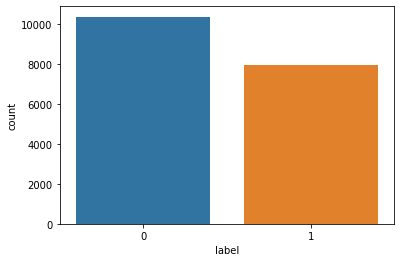

In [138]:
sns.countplot(x = 'label', data = news_df)

In [140]:
news_df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

### Data Preprocessing (before its ready for modeling)

In [85]:
# Developing a common field for title and author

news_df['desc'] = news_df['title'] + ' ' + news_df['author']

news_df['desc']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284              What Keeps the F-35 Alive David Swanson
Name: desc, Length: 18285, dtype: object

In [86]:
news_df

,id,title,author,text,label,desc
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [87]:
# Getting name of the author, title and text in one column

news_df['all_content'] = news_df['desc'] + ' ' + news_df['text']

In [88]:
# Building a new dataframe that has only colummns required for analysis

news_analysis_df = news_df[['all_content', 'label']]
news_analysis_df

,all_content,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...,0
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
18282,Macy’s Is Said to Receive Takeover Approach by...,0
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### Building the text transformer with training data

In [92]:
### Building a function that can take a row as an input, and do these tasks:
# Removing all stopwords
# Removing punctuation marks
# Removing repeating characters
# Removing URLs
# Removing numbers

stop_words = set(STOPWORDS)
punctuations = string.punctuation

def text_cleaner(text):
    text = " ".join([word for word in str(text).split() if word not in stop_words]) # Removing stopwords
    text_transformer = str.maketrans('', '', punctuations) 
    text = text.translate(text_transformer) # Removing punctuations
    text = re.sub(r'(.)1+', r'1', text) # Removing repeating characters
    text = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text) # Removing URLs
    text = re.sub('[0-9]+', '', text) # Removing numbers
    
    return text

In [93]:
### Building a new function that can take a text row as input, and do these tasks:
# Tokenization
# Stemming
# Lemmatization


stemming_data = nltk.PorterStemmer()
lemmatizing_data = nltk.WordNetLemmatizer()


def text_refiner(text):
    text = re.findall("[\w']+", text) # Tokenizer from regexp
    text = [stemming_data.stem(word) for word in text] # Stemming 
    text = [lemmatizing_data.lemmatize(word) for word in text] # Lemmatization
    
    return text

In [94]:
my_exp_df = news_analysis_df.copy(deep=True)

In [95]:
my_exp_df['all_content'] = my_exp_df['all_content'].apply(lambda x : text_cleaner(x))

my_exp_df

,all_content,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,1
1,FLYNN Hillary Clinton Big Woman Campus Breitb...,0
2,Why Truth Might Get You Fired Consortiumnewsco...,1
3,Civilians Killed In Single US Airstrike Have ...,1
4,Iranian woman jailed fictional unpublished sto...,1
...,...,...
18280,Rapper TI Trump ’Poster Child For White Suprem...,0
18281,NFL Playoffs Schedule Matchups Odds The New Y...,0
18282,Macy’s Is Said Receive Takeover Approach Hudso...,0
18283,NATO Russia To Hold Parallel Exercises In Balk...,1


In [96]:
my_exp_df['all_content'] = my_exp_df['all_content'].apply(lambda x : text_refiner(x))

my_exp_df

,all_content,label
0,"[hous, dem, aid, We, didn, t, even, see, comey...",1
1,"[flynn, hillari, clinton, big, woman, campu, b...",0
2,"[whi, truth, might, get, you, fire, consortium...",1
3,"[civilian, kill, In, singl, US, airstrik, have...",1
4,"[iranian, woman, jail, fiction, unpublish, sto...",1
...,...,...
18280,"[rapper, TI, trump, poster, child, for, white,...",0
18281,"[nfl, playoff, schedul, matchup, odd, the, new...",0
18282,"[maci, s, Is, said, receiv, takeov, approach, ...",0
18283,"[nato, russia, To, hold, parallel, exercis, In...",1


In [36]:
# Since we can see that the functions are working (ignoring warnings for now), we can go ahead with applying
# the required transformation on the dataset

In [97]:
news_analysis_df['all_content'] = news_analysis_df['all_content'].apply(lambda x : text_cleaner(x))
news_analysis_df['all_content'] = news_analysis_df['all_content'].apply(lambda x : text_refiner(x))

news_analysis_df

/Users/avinash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/avinash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,all_content,label
0,"[hous, dem, aid, We, didn, t, even, see, comey...",1
1,"[flynn, hillari, clinton, big, woman, campu, b...",0
2,"[whi, truth, might, get, you, fire, consortium...",1
3,"[civilian, kill, In, singl, US, airstrik, have...",1
4,"[iranian, woman, jail, fiction, unpublish, sto...",1
...,...,...
18280,"[rapper, TI, trump, poster, child, for, white,...",0
18281,"[nfl, playoff, schedul, matchup, odd, the, new...",0
18282,"[maci, s, Is, said, receiv, takeov, approach, ...",0
18283,"[nato, russia, To, hold, parallel, exercis, In...",1


In [98]:
news_analysis_df.isnull().sum()

all_content    0
label          0
dtype: int64

After doing all of this, now we have a dataframe (news_analysis_df) with the columns 'all_content' and 'label'.
Our text in 'all_content' has underwent these processing steps:

Stage 1: Cleaning
1. Removing all stopwords
2. Removing punctuation marks
3. Removing repeating characters
4. Removing URLs
5. Removing numbers

Stage 2: Refinement
1. Tokenization
2. Stemming
3. Lemmatization

Now, we need to use the vectorizer to transform the textual data in a numerical vector format. But before that, we need to create each list of words into a single text and then we'll split the refined dataframe into training and testing dataset.

In [99]:
# Joining all the elements of a list in each row into a single string

news_analysis_df['all_content'] = news_analysis_df['all_content'].apply(lambda x : ' '.join(x))

news_analysis_df

/Users/avinash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,all_content,label
0,hous dem aid We didn t even see comey s letter...,1
1,flynn hillari clinton big woman campu breitbar...,0
2,whi truth might get you fire consortiumnewscom...,1
3,civilian kill In singl US airstrik have been i...,1
4,iranian woman jail fiction unpublish stori wom...,1
...,...,...
18280,rapper TI trump poster child for white suprema...,0
18281,nfl playoff schedul matchup odd the new york t...,0
18282,maci s Is said receiv takeov approach hudson s...,0
18283,nato russia To hold parallel exercis In balkan...,1


### Keeping only relevant columns for analysis

In [100]:
# Separating the independent and dependent variables

X = news_analysis_df.all_content
y = news_analysis_df.label

### Splitting the data in train and test

In [101]:
# Splitting the dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [102]:
X_train

5838     the protest At muskrat fall mainstream medium ...
7460     starchitect citi vaniti fair gentrif joseph gr...
1293     gay cathol group want pope franci Do more than...
17178    proamerican nonpc espn host sage steel remov n...
6273     david duke exult thi day begin take america ba...
                               ...                        
1884     how s thi differ from bill cosbi past hillari ...
9626     bullion bank pas parcel On El salvador s gold ...
10743    comment dave matthew play stand rock camp anno...
8587     microsoft cancel scalebound part way develop p...
14817    love undon the new york time deborah levi thi ...
Name: all_content, Length: 14628, dtype: object

### Setting up the tfidf vectorizer

In [104]:
# Initialise the vectorizer 

tfidfvectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

# Fitting the training dataset into the vectorizer 
tfidfvectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [105]:
# Checking the number of feature words that'll be printed using this vectorizer
print('No. of feature_words: {}'.format(len(tfidfvectorizer.get_feature_names())))

No. of feature_words: 500000


In [106]:
# Transforming both the training and testing dataset based on tfidf vectorizer

X_train  = tfidfvectorizer.transform(X_train)
X_test = tfidfvectorizer.transform(X_test)

### Building Base Models

In [118]:
# Importing modules needed for analysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

### Functions for Classification Report, Confusion Matrix and ROC-AUC curve

In [126]:
# Building different functions to get classification report, confusion matrix and ROC-AUC curve

# Predict values for Test dataset
#   y_pred = model.predict(X_test)

# Function for Classification Report
def evaluate_with_classification_report(test_actual_results, test_predicted_results, model_name):
    
  # Print the evaluation metrics for the dataset.
  print(classification_report(test_actual_results, test_predicted_results))

In [119]:
# Function for confusion matrix

def build_confusion_matrix(test_actual_results, test_predicted_results, model_name):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(test_actual_results, test_predicted_results)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    

In [120]:
# Function for ROC-AUC curve

def draw_ROC_AUC_Curve(test_actual_results, test_predicted_results, model_name):
    fpr, tpr, thresholds = roc_curve(test_actual_results, test_predicted_results)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

### Building a Machine Learning model with Logistic Regression

In [121]:
# Initialising, fitting on train data and predicting on test data

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2072
           1       0.98      0.96      0.97      1585

    accuracy                           0.97      3657
   macro avg       0.97      0.97      0.97      3657
weighted avg       0.97      0.97      0.97      3657



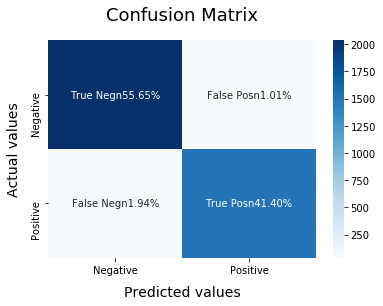

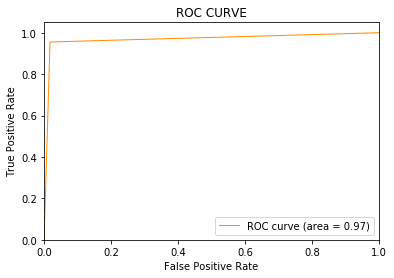

In [127]:
# Checking the accuracy of predictions on test data

# Confusion Matrix
build_confusion_matrix(y_test, y_pred_logistic, 'logistic_regression')

# Classification Report
evaluate_with_classification_report(y_test, y_pred_logistic, 'logistic_regression')

# ROC-AUC Curve
draw_ROC_AUC_Curve(y_test, y_pred_logistic, 'logistic_regression')

### Building a Machine Learning model with Naive Bayes

In [130]:
# Initialising, fitting on train data and predicting on test data

NB_model = BernoulliNB()
NB_model.fit(X_train, y_train)
y_pred_NB = NB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2072
           1       0.86      0.94      0.90      1585

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



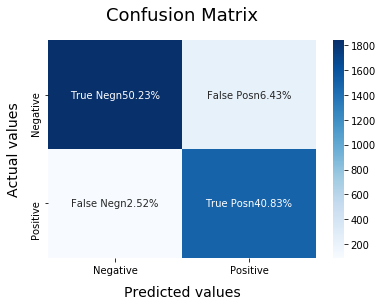

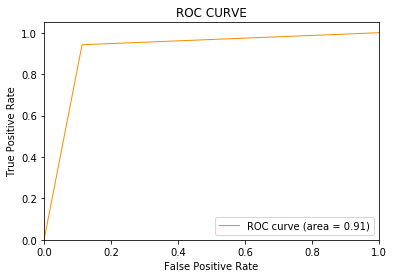

In [131]:
# Checking the accuracy of predictions on test data

# Confusion Matrix
build_confusion_matrix(y_test, y_pred_NB, 'Naive Bernoulli')

# Classification Report
evaluate_with_classification_report(y_test, y_pred_NB, 'Naive Bernoulli')

# ROC-AUC Curve
draw_ROC_AUC_Curve(y_test, y_pred_NB, 'Naive Bernoulli')

### Building a Machine Learning model with SVC

In [132]:
# Initialising, fitting on train data and predicting on test data

SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
y_pred_SVC = SVC_model.predict(X_test)

In [5]:
# Checking the accuracy of predictions on test data

# Confusion Matrix
build_confusion_matrix(y_test, y_pred_SVC, 'SVM')

# Classification Report
evaluate_with_classification_report(y_test, y_pred_SVC, 'SVM')

# ROC-AUC Curve
draw_ROC_AUC_Curve(y_test, y_pred_SVC, 'SVM')

NameError: name 'build_confusion_matrix' is not defined

### Building a Machine Learning model with Multinomial Naive Bayes

In [134]:
# Initialising, fitting on train data and predicting on test data

Multi_NB_model = MultinomialNB()
Multi_NB_model.fit(X_train, y_train)
y_pred_MNB = Multi_NB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2072
           1       1.00      0.51      0.68      1585

    accuracy                           0.79      3657
   macro avg       0.86      0.76      0.76      3657
weighted avg       0.85      0.79      0.77      3657



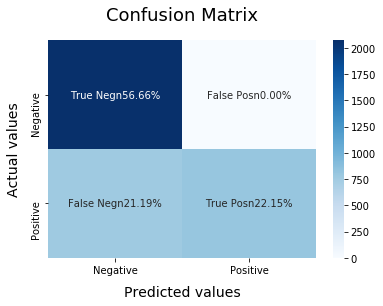

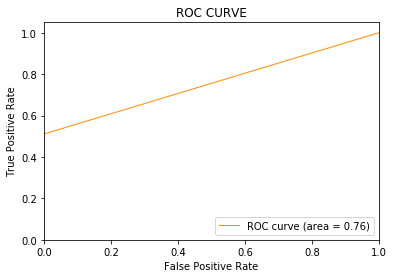

In [135]:
# Checking the accuracy of predictions on test data

# Confusion Matrix
build_confusion_matrix(y_test, y_pred_MNB, 'Multinomial Naive Bayes')

# Classification Report
evaluate_with_classification_report(y_test, y_pred_MNB, 'Multinomial Naive Bayes')

# ROC-AUC Curve
draw_ROC_AUC_Curve(y_test, y_pred_MNB, 'Multinomial Naive Bayes')

### Building a Machine Learning model with XGBoost

In [136]:
# Initialising, fitting on train data and predicting on test data

XGB_model = xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
XGB_model.fit(X_train,y_train)
y_pred_XGB = XGB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2072
           1       0.97      0.98      0.97      1585

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



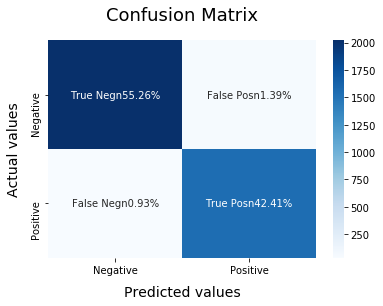

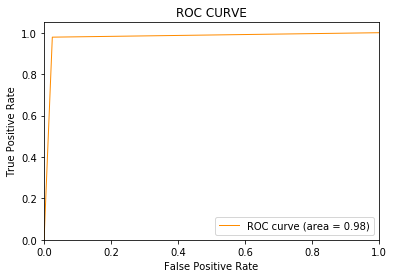

In [137]:
# Checking the accuracy of predictions on test data

# Confusion Matrix
build_confusion_matrix(y_test, y_pred_XGB, 'XGBoost')

# Classification Report
evaluate_with_classification_report(y_test, y_pred_XGB, 'XGBoost')

# ROC-AUC Curve
draw_ROC_AUC_Curve(y_test, y_pred_XGB, 'XGBoost')

# Parameter Tuning